# Assignment 3 for Course 1MS041
Make         sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline         and your highest score will be used.

---
## Assignment 3, PROBLEM 1
Maximum Points = 8


Consider the data `X` and `y`, in the cell below. `X` denotes $20$ points in $\mathbb{R}^2$ and `y` corresponds to the labels for these points, i.e. it is a classification problem.

1. [3p] Implement the function `perceptron` by filling in `XXX`.
2. [2p] Use your implemented `perceptron` function to compute a vector (numpy array) $\hat w$ with shape `(3,1)` such that 
$$
    (\hat w \cdot \hat x_i) l_i > 0, \quad \forall i=1,\ldots,20
$$
put your answer in `hat_w` below (the last dimension is the bias dimension, i.e. the added dimension we used to derive the perceptron)
3. [3p] Use the vector $\hat w$ that you just found and compute $r = \max_i |x_i|$ (put your result in `r`), finally use this to give an upper bound to the number of iterations needed for the perceptron algorithm to converge on this dataset, see chapter 8 in the ITDS notes. Put the result in `iteration_bound`.

In [2]:

import numpy as np
X = np.array([[0.14774693918368506,0.8537253157278155],[-0.1755517430286779,0.8979710703337818],[0.5227216475286975,0.7448281947022451],[-0.5071170511153492,0.8002027400836075],[-0.39436968212400453,1.0177689414422981],[-0.3983065780966649,1.0443663197782966],[-0.08652771617599643,0.48036820824519255],[0.15352541170101042,0.6820807981911706],[-0.3303348532791869,1.120673883903539],[-0.2656220857139274,0.8526638282828739],[0.7259603693529442,0.25428467532034965],[0.4577253912481767,-0.2358809079980879],[0.9722462145222105,0.13128550836973255],[0.4089349951770505,-0.09503914544452634],[0.9718156747909192,0.3524307824261209],[1.2009353774940565,-0.25004126389987974],[1.271791635779178,-0.07571928320750206],[0.36784476124502913,-0.23743021661715671],[0.8918396050420891,-0.1029336332277948],[0.4501578013678095,-0.13188266835015783]])+np.array([10,0]).reshape(1,-1)
y = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0])

In [3]:
# Part 1
def perceptron(X_in,labels,max_iter=10000):
    '''Runs the perceptron algorithm on X_in, labels, and does a maximum of max_iter iterations'''
    
    # Add the bias term 1 to each observation
    X_incl_bias = np.array([np.append(x, 1) for x in X_in])
    n_points = X_incl_bias.shape[0]
    w = np.array([0, 0, 0])
    
    w_hat = w
    
    # Iterate max number of times through all points
    for j in range(max_iter // n_points):
        criteria_count = 0
        
        # Go through each data point and update w each time condition doesn't hold
        for i in range(len(X_incl_bias)):
            if (X_incl_bias[i] @ w_hat) * labels[i] <= 0:
                w_hat = w_hat + X_incl_bias[i] * labels[i]
                criteria_count += 1
        
        # If all points in the last iteration met the condition, break
        if criteria_count == 0:
            break
    
    # Dont forget the addition of the extra dimension to encode the
    # bias in the perceptron, i.e. adding the extra dimension with value 1
    
    return w_hat #Make sure that w has the shape described in the problem
X_incl_bias = np.array([np.append(x, 1) for x in X])

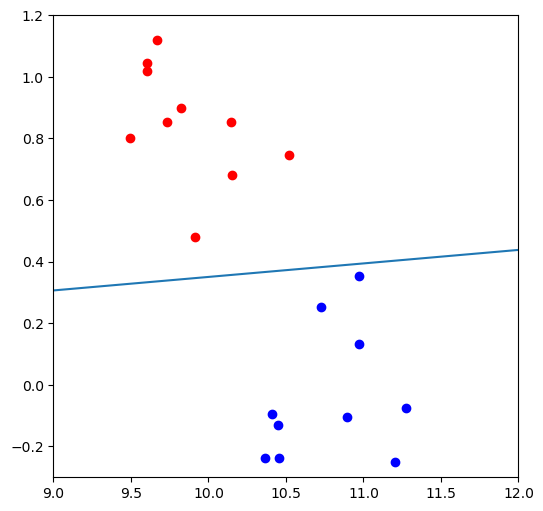

In [4]:
# Part 1

w_hat_calc = perceptron(X, y)
w_hat_calc = w_hat_calc.reshape(3, 1)
hat_w = w_hat_calc

%matplotlib inline
import matplotlib.pyplot as plt

X1 = X[:10]
X2 = X[10:]

plt.figure(figsize=(6,6))
plt.scatter(X1[:,0],X1[:,1], color='red')
plt.scatter(X2[:,0],X2[:,1], color='blue')

x_left = 8
x_right = 12
y_left = 0
y_right = 0
y_left = (-hat_w[2] - x_left * hat_w[0]) / hat_w[1]
y_right = (-hat_w[2] - x_right * hat_w[0]) / hat_w[1]
plt.plot([x_left, x_right], [y_left, y_right])
plt.xlim(9, 12)
plt.ylim(-0.3, 1.2)

plt.show()

In [305]:
# Part 2

r_calc = np.max(np.array([np.linalg.norm(vector) for vector in X_incl_bias]))
r = r_calc

results = []
for i in range(len(y)):
    res = (X_incl_bias[i] @ hat_w) * y[i]
    results.append(res)
c = min(results)
w_star = hat_w / c

iteration_bound_calc = (r ** 2) * (np.linalg.norm(w_star) ** 2)
iteration_bound = iteration_bound_calc

---
## Assignment 3, PROBLEM 2
Maximum Points = 8


For this problem you will need the [pandas](https://pandas.pydata.org/) package and the [sklearn](https://scikit-learn.org/stable/) package. If you download the updated `data` folder from the course website you will find a file called `indoor_train.csv`, this file includes a bunch of positions in (X,Y,Z) and also a location number. The idea is to assign a room number (Location) to the coordinates (X,Y,Z).

1. [2p] Take the data in the file `indoor_train.csv` and load it using pandas into a dataframe `df_train`
2. [3p] From this dataframe `df_train`, create two numpy arrays, one `Xtrain` and `Ytrain`, they should have sizes `(1154,3)` and `(1154,)` respectively. Their `dtype` should be `float64` and `int64` respectively.
3. [3p] Train a Support Vector Classifier, `sklearn.svc.SVC`, on `Xtrain, Ytrain` with `kernel='linear'` and name the trained model `svc_train`.

To mimic how [kaggle](https://www.kaggle.com/) works, the Autograder has access to a hidden test-set and will test your fitted model.

In [5]:

import pandas as pd

# Load data and store in datafram

temp_load = pd.read_csv("data/indoor_train.csv")
df_train = temp_load
df_train.head(5)

,Position X,Position Y,Position Z,Location
0,32.0,15.0,4.4,18
1,8.0,17.0,1.5,9
2,4.0,13.0,4.4,13
3,39.0,16.0,4.4,18
4,34.0,12.0,7.6,15


In [6]:

import numpy as np

# Select X and Y training data

X_train_temp = np.array(df_train.drop("Location", axis="columns"))
Y_train_temp = np.array(df_train["Location"])
Xtrain = X_train_temp
Ytrain = Y_train_temp

In [7]:

from sklearn.svm import SVC

# Fit SVM classifier and store trained model object

svm_classifier = SVC(kernel="linear")
trained_model = svm_classifier.fit(Xtrain, Ytrain)
svc_train = trained_model

---
## Assignment 3, PROBLEM 3
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. (This is precision)
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Estimate the probability that the word "free" or "prize" is in the text given that it is spam. (This is recall) I.e. estimate
$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) \enspace .
$$
3. [2p] Provide a "90\%" interval of confidence around the true probability from **part 1**. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$

**Solutions**

1. The conditional probability $\mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X)$ is given by the formula

$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) = 
    \frac{\mathbb{P}(Y = 1 \cap \text{"free" or "prize" is in } X)}{\mathbb{P}(\text{"free" or "prize" is in } X)}
$$

2. The conditional probability $\mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1)$ is given by the formula

$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) = 
    \frac{\mathbb{P}(Y = 1 \cap \text{"free" or "prize" is in } X)}{\mathbb{P}(Y = 1)}
$$ 

3. Hoeffding's inequality for the binomial case is given by 

$$
 \mathbb{P}(\bar{X}_n - \delta \leq p \geq \bar{X}_n + \delta) \geq 1 - \alpha
$$ 

and 

$$
    \delta = \frac{1}{\sqrt{n}}\sqrt{\frac{1}{2}ln(\frac{2}{\alpha})}
$$

In [8]:

# Run this cell to get the SMS text data
def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(line[1], hamspam[line[0]], ) for line in reader]
        
    return lines
spam_no_spam = load_sms()
spam_no_spam = [(text.lower().split(), label) for (text, label) in spam_no_spam]

In [9]:

# fill in the estimate for part 1 here (should be a number between 0 and 1)

# Keywords to look for
spam_keywords = ["free", "prize"]

# Filter lines for those containing keywords + those with keywords and labeled spam 
keyword_lines = [(text, label) for (text, label) in spam_no_spam if any(keyword in text for keyword in spam_keywords)]
keyword_spam_lines = [(text, label) for (text, label) in keyword_lines if label == 1]

# Calculate conditional probability as the ratio between len of those lists
cond_proba_1 = len(keyword_spam_lines) / len(keyword_lines)
cond_proba_1

problem4_hatP = cond_proba_1

In [11]:

# fill in the estimate for part 2 here (should be a number between 0 and 1)

# Filter lines for those containing spam
spam_lines = [(text, label) for (text, label) in spam_no_spam if label == 1]

# Calculate conditional probability
cond_proba_2 = len(keyword_spam_lines) / len(spam_lines)

problem4_hatP2 = cond_proba_2

In [14]:

# fill in the calculated l from part 3 here
n_spam_and_keywords = len(keyword_spam_lines)
alpha = 0.1
delta = (1 / np.sqrt(n_spam_and_keywords)) * np.sqrt((1 / 2) * np.log(2 / alpha))

problem4_l = delta